# Machine Learning Techniques

Rodžers Ušackis, ACS301

## About Dataset

This dataset contains house sale prices for King County, which includes Seattle.
It includes homes sold between May 2014 and May 2015.

*It's a great dataset for evaluating simple regression models.*

## Configuration

In [323]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb

from matplotlib import pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping

dataframe = pd.read_csv('dataset/kc_house_data.csv')

## Data exploration

The purpose of this section, is to just walk through the dataset and inspect what kind of values I'm dealing with, and if there's anything that I will need to pay attention to directly.

This is not meant for documentation, more for myself, so there's not going to be a lot of comments for the outputs.

### General inspection

In [324]:
dataframe.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [325]:
dataframe.shape

(21613, 21)

The dataset contains 21 columns and 21'613 rows.

In [326]:
dataframe.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

The 'date' column is of type 'object' which is something that we will need to change.

Also, from what I can see, it could be useful to use One Hot Encoding for the zipcode column since it's a categorical value and not a nominal one.

In [327]:
dataframe.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Reviewing NaN values

In [328]:
values = []
for (columnName, columnData) in dataframe.items():
    values.append([columnName, dataframe[columnName].isna().sum()])

print(tabulate(values, headers=['Column', 'NaN Values'], tablefmt='fancy-grid'))

Column           NaN Values
-------------  ------------
id                        0
date                      0
price                     0
bedrooms                  0
bathrooms                 0
sqft_living               0
sqft_lot                  0
floors                    0
waterfront                0
view                      0
condition                 0
grade                     0
sqft_above                0
sqft_basement             0
yr_built                  0
yr_renovated              0
zipcode                   0
lat                       0
long                      0
sqft_living15             0
sqft_lot15                0


There aren't any NaN values, which is a good sign, less preprocessing for me to do...

But if there were NaN values and I had to take care of them, I would do it with K-Nearest-Neighbours.

It's a technique I used for an assignment we had for Data & A.I. 6, and it worked really well.

## Correlation between variables

The reason it is important to check for correlation between variables is because often times high correlation between variables can negatively affect the prediction models.

### Viewing the matrix

Text(0.5, 1.0, 'Correlation Heatmap')

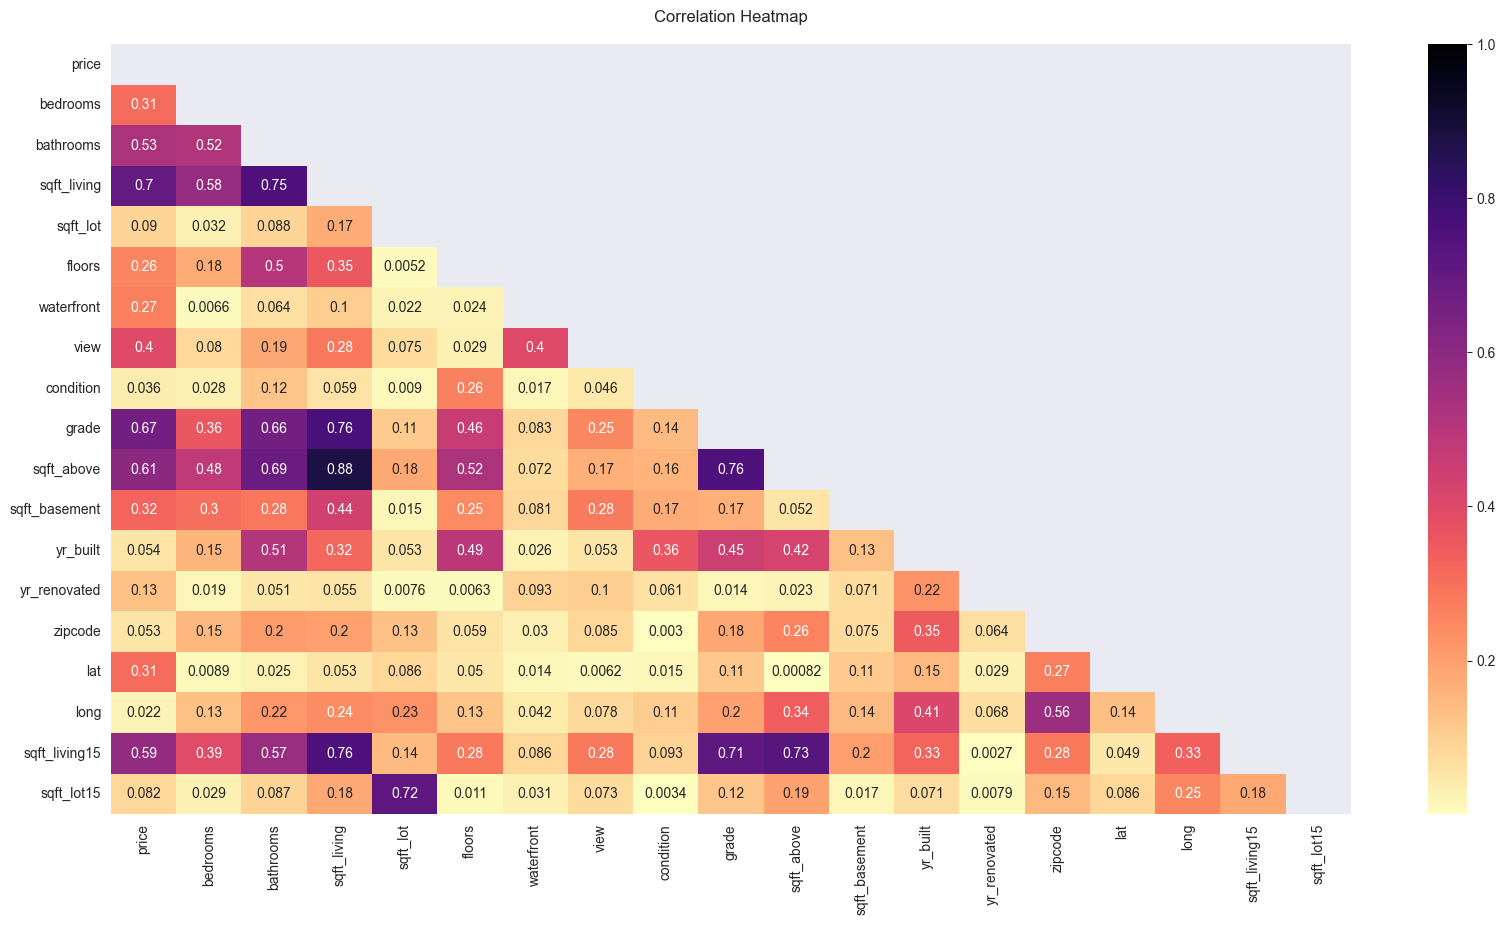

In [329]:
dataframe_correlation = dataframe.loc[:, ~dataframe.columns.isin(['date', 'id'])].corr(numeric_only=True).abs()
mask = np.triu(np.ones_like(dataframe_correlation, dtype=bool))

plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(dataframe_correlation, mask=mask, annot=True, vmax=1, cmap='magma_r')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=16)


# Usually, the correlation values would be defined as follows:

# Exactly –1. A perfect negative (downward sloping) linear relationship
# –0.70. A strong negative (downward sloping) linear relationship
# –0.50. A moderate negative (downhill sloping) relationship
# –0.30. A weak negative (downhill sloping) linear relationship
# 0. No linear relationship
# +0.30. A weak positive (upward sloping) linear relationship
# +0.50. A moderate positive (upward sloping) linear relationship
# +0.70. A strong positive (upward sloping) linear relationship
# Exactly +1. A perfect positive (upward sloping) linear relationship


# But since, I'm not interested whether the values have a positive or negative linear relationship,  
# I specified that the minimum value should be 0, and the maximum 1.

#### Personal thoughts on the correlation model

At first, I couldn't figure out what to do with the values I'm seeing.

On one hand, there's a lot of highly correlated values shown, but on the other hand, although they are highly correlated, I don't think they warrant removal.

Like for example, bathrooms and sqrt_living.
They have a high correlation, but it's not a given.

Since I was perplexed with the values I was seeing, I decided to test out what happened if I removed some columns, and I came to the conclusion that the models work at their best when the columns are untouched.

Even removing 'grade' which is not an independent value, but is purely based on other values, had negative consequences.

Therefore, I decided to make no changes regarding the columns further in the document.

# Pre Processing

The decisions made here are based on what I saw from the sections above.

### Columns of the dataframe

Based on what I can see, there's no need to change any of the column names, everything is self-explanatory.

But there does seem to be some columns that won't be necessary for the modeling part, so I will remove them instantly.

Starting with the 'id' column.

This one is absolutely useless and brings no value for the prediction model, therefore I will drop it completely.

In [330]:
dataframe.drop(columns=['id'], inplace=True)

Besides that, I will also convert the 'date' column from type 'object' to 'datetime'.

In [331]:
dataframe['date'] = pd.to_datetime(dataframe['date'])

For the 'zipcode' column I decided to One Hot Encode it, since converting categorical values into numerical data helps ML algorithms to do a better job in prediction.

If we were to leave them as is, the prediction model would look at the 'zipcode' value as if it was nominal.

In [332]:
dataframe['zipcode'] = dataframe['zipcode'].astype(str)

one_hot = OneHotEncoder()
encoded = one_hot.fit_transform(dataframe[['zipcode']])
dataframe[one_hot.categories_[0]] = encoded.toarray()

dataframe.drop('zipcode', axis=1, inplace=True)

Same goes for the latitude and longitude columns, but instead of Hot Encoding them, I will just remove them, since they bring no justifiable value to the table.

Using only the 'zipcode' will be enough.

In [333]:
dataframe.drop(['lat', 'long'], axis=1, inplace=True)

### Outliers

Another important part of pre-processing is the removal of outliers, therefore I will check if we have any.

#### Boxplots

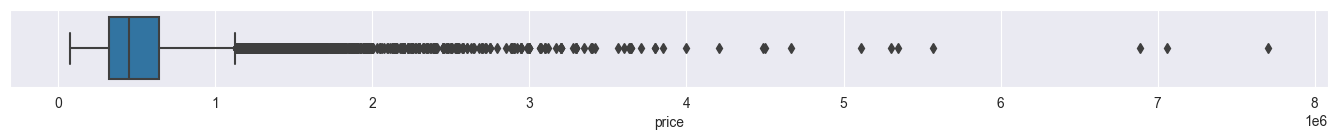

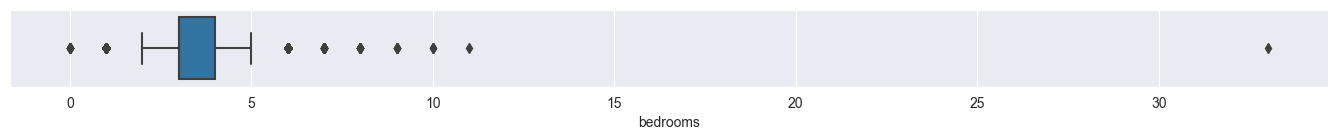

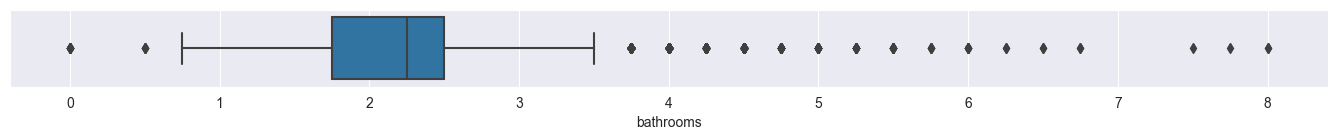

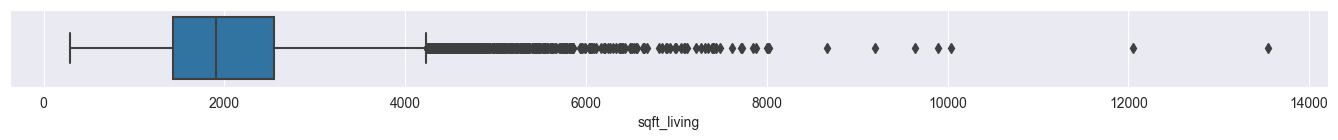

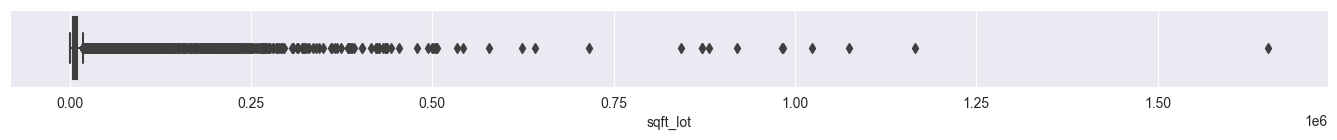

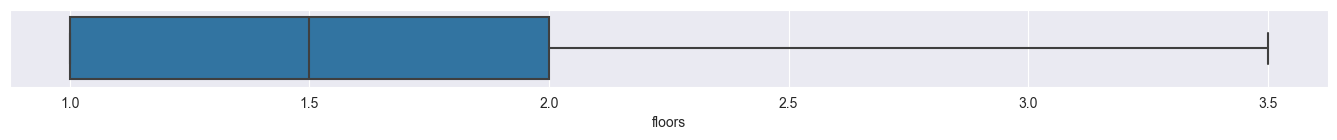

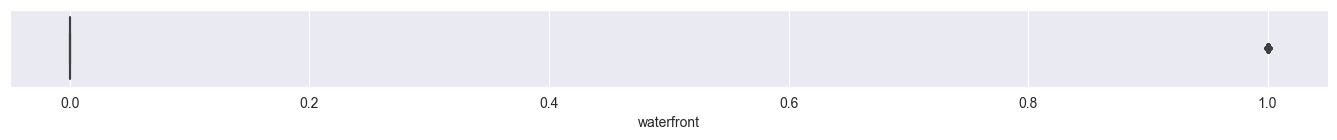

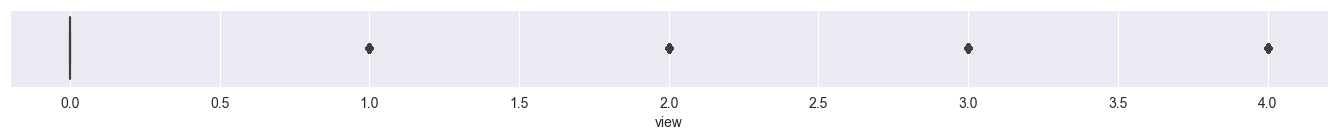

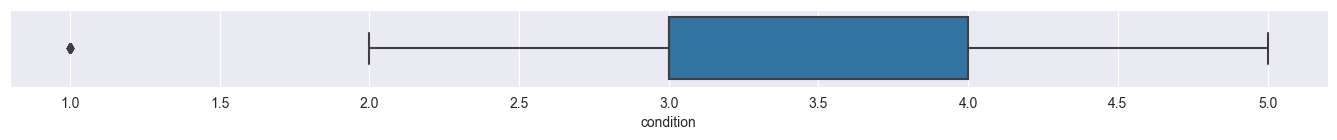

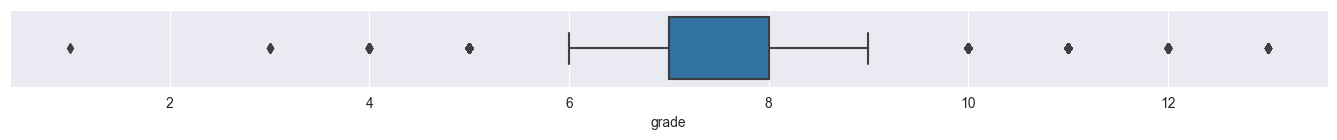

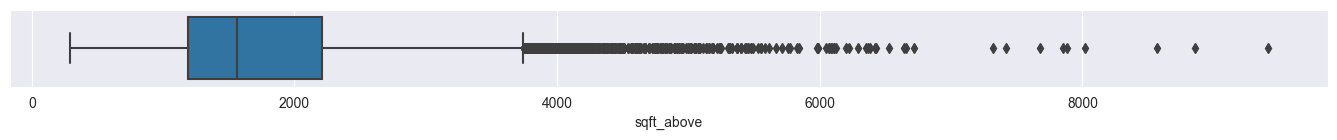

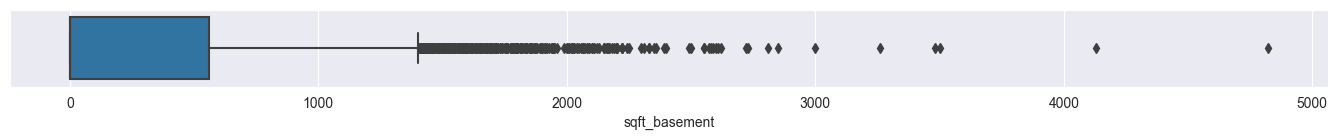

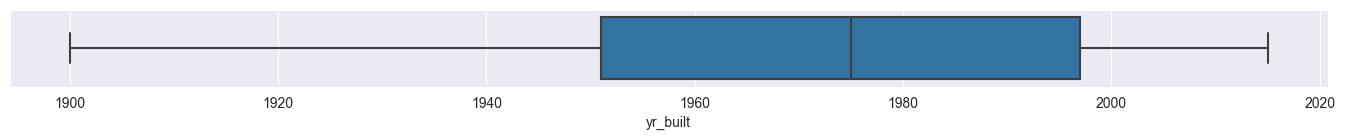

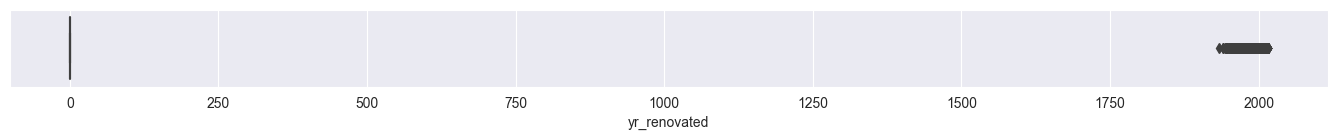

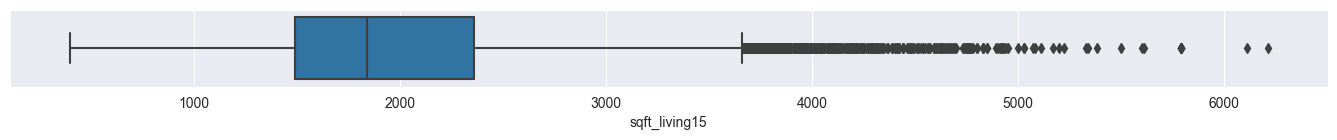

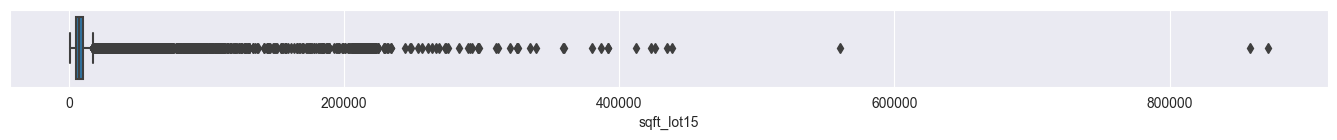

In [334]:
df = dataframe[
    ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
     'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']]

for column in df:
    plt.figure(figsize=(17, 1))
    sns.boxplot(data=df, x=column)

##### Boxplot analysis

Based on the results, there aren't many values that I would consider to be outliers.

They're all characteristics of a house and not anomalies in data, as it could be for example with sensors.

One thing I do notice though is that there seems to be a house with 33 bedrooms, so I will assume that it is a typo.
Even if it isn't, and it is a luxury house, it won't hurt the model if we remove it, so I'll do that just to be safe.

And on that note, now that I think about it, in order to improve my model, I will remove the super luxurious homes at the right side of the spectrum.
(above 6 million)

You could argue that it's not the correct thing to do, but I think it depends on what you're using the model for.

In any case it will be really hard to calculate an accurate prediction for luxurious homes, since there's so few of them and their pricing is abstract.

If I theoretically was a person interested in buying a house and would want to make a comparison between a house listed for sale, and historical data, I wouldn't be interested in such expensive houses either way.

If it was up to me and my neccessities, I would remove all houses above 1M, but for the sake of this assignment, I will only remove houses above 6M.

##### Removing outliers based on my boxplot analysis

I will first copy the frame, since I'm interested in preserving the before and after.

In [335]:
dataframe_with_removed_outliers = dataframe.copy()

Then I will remove the row which contains 33 bedrooms, by limiting the allowed bedroom count to be less than 13.

In [336]:
rows_before = dataframe_with_removed_outliers.shape[0]
index_names = dataframe_with_removed_outliers[dataframe_with_removed_outliers['bedrooms'] > 13].index

dataframe_with_removed_outliers.drop(index_names, inplace=True)

print('Number of rows, where the bedroom count was above 13: {}'.format(
    rows_before - dataframe_with_removed_outliers.shape[0]))

Number of rows, where the bedroom count was above 13: 1


In [337]:
rows_before = dataframe_with_removed_outliers.shape[0]
index_names = dataframe_with_removed_outliers[dataframe_with_removed_outliers['price'] > 6000000].index

dataframe_with_removed_outliers.drop(index_names, inplace=True)

print('Number of rows, where the price was above 6M: {}'.format(rows_before - dataframe_with_removed_outliers.shape[0]))

Number of rows, where the price was above 6M: 3


As for the rest of the columns, I see no reason to remove anything.

Now after removing some data, I will check the boxplot again to see if there are any new observations I can make.

#### Checking the boxplots again, post data removal

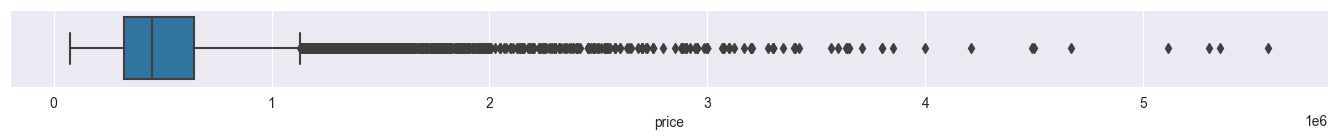

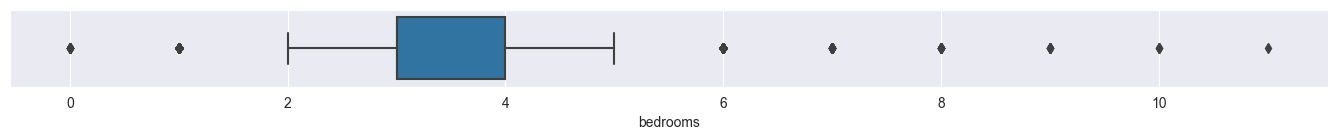

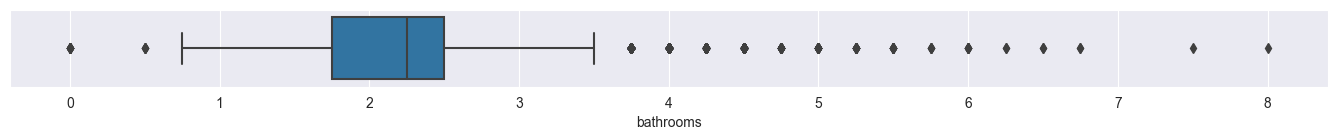

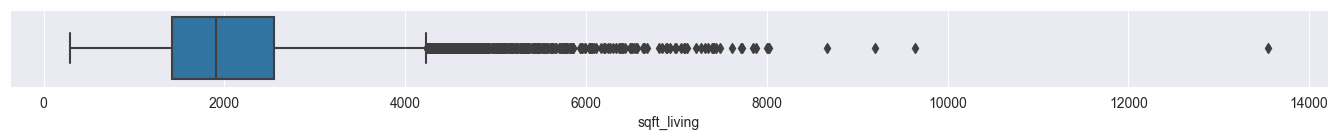

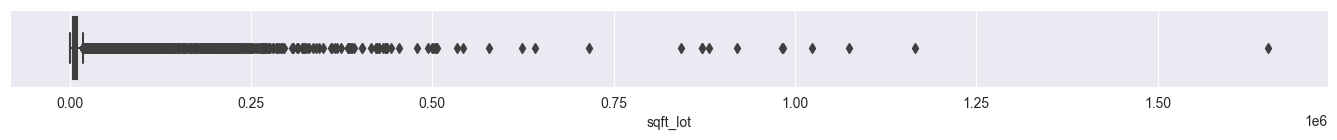

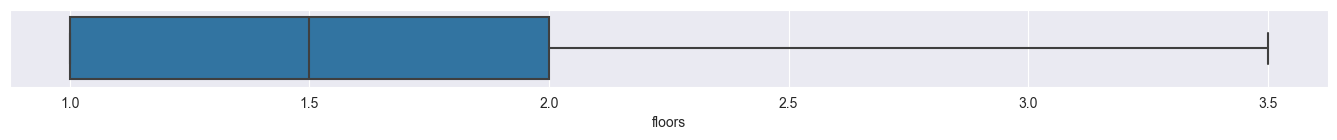

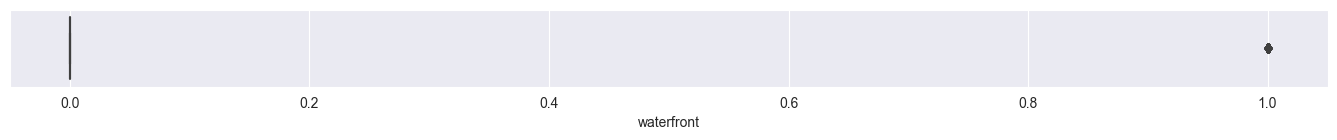

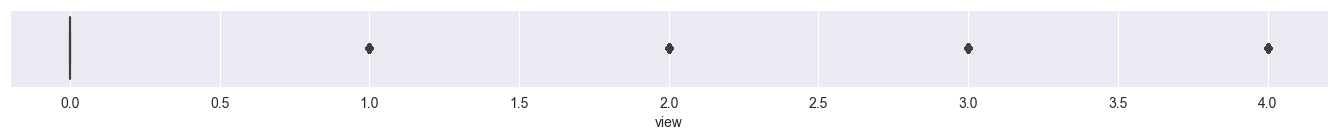

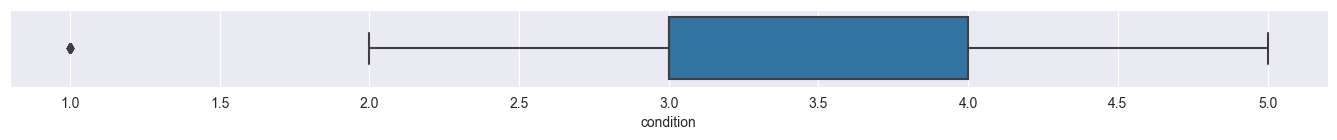

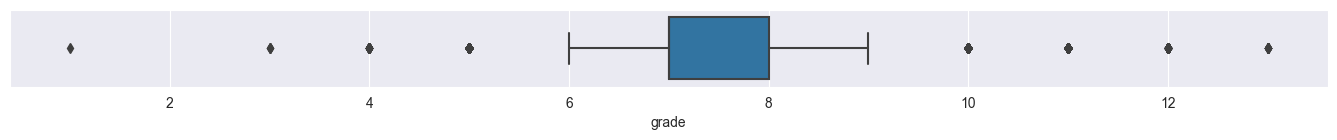

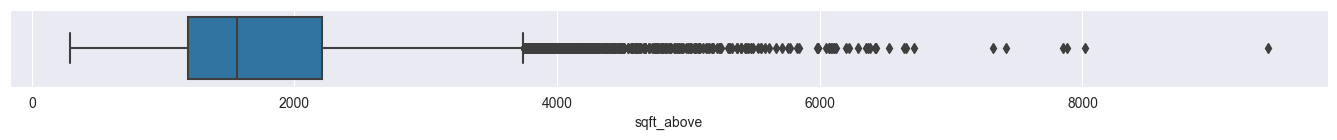

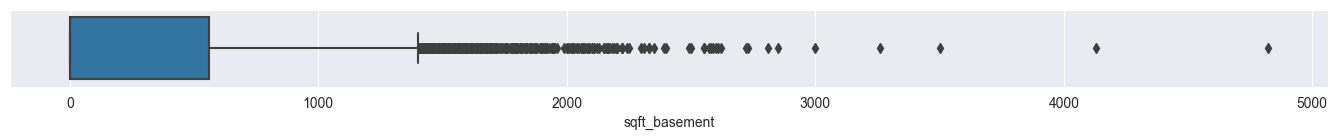

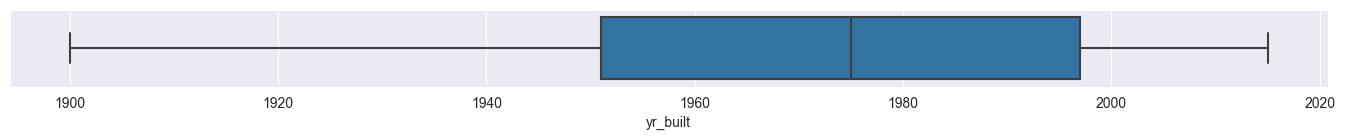

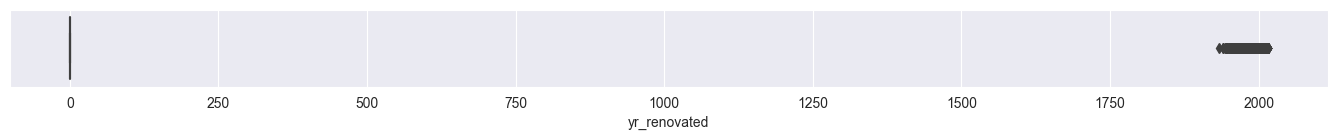

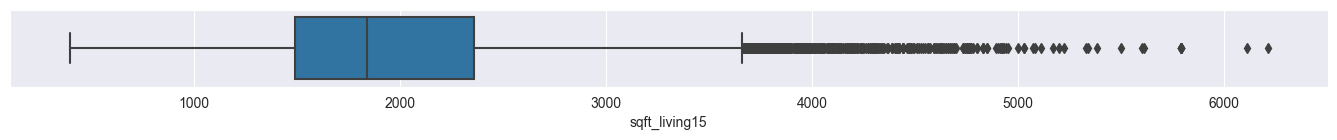

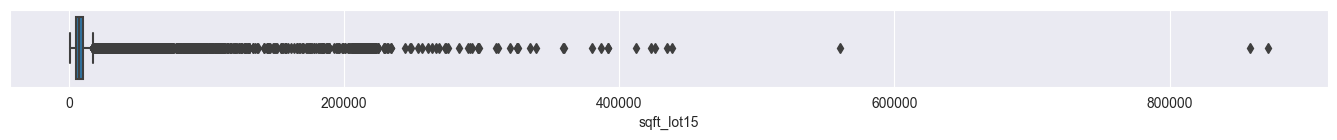

In [338]:
df = dataframe_with_removed_outliers[
    ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
     'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']]

for column in df:
    plt.figure(figsize=(17, 1))
    sns.boxplot(data=df, x=column)

Since a decision was made to keep most of the data in-tact, I will only remove one more instance.

In [339]:
rows_before = dataframe_with_removed_outliers.shape[0]
index_names = dataframe_with_removed_outliers[dataframe_with_removed_outliers['sqft_living'] > 10000].index

dataframe_with_removed_outliers.drop(index_names, inplace=True)

print('Number of rows, where the sqft_living was above 10`000: {}'.format(
    rows_before - dataframe_with_removed_outliers.shape[0]))

Number of rows, where the sqft_living was above 10`000: 1


As for the rest of the data, the boxplots look good, therefore I will make no further changes.

# Modelling

### Setting the features and target

For each of the models, we specify the values which will be used for predicting, and which value is the target for the prediction.

Also known as 'features' and 'target'.

In our case the target will be the 'price' column, and the features will be every column besides 'price' and 'date'.

In [340]:
# Setting the value for independent (X) variable and dependent (Y) variable
x = dataframe_with_removed_outliers.loc[:, ~dataframe_with_removed_outliers.columns.isin(['price', 'date'])]

y = dataframe_with_removed_outliers['price']

### Splitting the dataset

In order to train our models we have to create training and testing sets.

For this, I split the data as such:
- 70% for training
- 30% for testing

I also decided to use 'random_state=100', which is basically a seed value, meaning that the predictions (if nothing has been changed) will be the same each time.

This allows me to more accurately test my models between changes.

In [341]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

### Data normalization

The reason for doing data normalization, is to transform features to be on a similar scale by changing the values of numeric columns in the dataset to a common scale, without distorting differences in the range of values.

This improves the performance and training stability of the models.

Since we have a lot of columns with varying ranges of values, this is extremely important.

In [342]:
mean_x = x_train.mean()
std_x = x_train.std()

mean_y = y_train.mean()
std_y = y_train.std()

x_train_norm = (x_train - mean_x) / std_x
x_test_norm = (x_test - mean_x) / std_x

y_train_norm = (y_train - mean_y) / std_y
y_test_norm = (y_test - mean_y) / std_y

### Global Variables

In [343]:
SCORING_TYPE = ['r2', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error']
N_SPLITS = 6
K_FOLD = KFold(n_splits=N_SPLITS, shuffle=True, random_state=100)

### Model results function

With this function I will print out and save the results of the most important metrics.

Such as:
- R Squared Value
- Mean Absolute Error (MAE)
- Mean Absolute Percentage Error (MAPE)

For cross validation I partitioned the dataset into 6 partitions.

#### Definition of K-Fold Cross-Validation

K-fold cross-validation is a technique where the original sample is randomly partitioned into k equal sized subsamples.
Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data.
The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data.
The k results from the folds can then be averaged to produce a single estimation.
The advantage of this method over repeated random sub-sampling is that all observations are used for both training and validation, and each observation is used for validation exactly once.

The procedure is as follows:
- Shuffle the dataset randomly.
- Split the dataset into   groups
- For each of the groups:
  - Take a group as a holdout validation set
  - Combine the remaining   groups as a training data set
  - Fit a model on the training set and evaluate it on the validation set
  - Retain the evaluation score and discard the model
  - Repeat for the next group
- The performance score is the average of the values computed in the loop
- The final model is evaluated on the test set

Source: The Provided Jupyter Notebook file on model validation.
More info: [documentation](https://scikit-learn.org/stable/modules/cross_validation.html#k-fold)

In [344]:
def print_cross_validation_results(model, x, y, model_name):
    # Cross validation
    scores = cross_validate(model, x, y, cv=K_FOLD, scoring=SCORING_TYPE, return_train_score=True)

    # Results
    # Test set
    test_r_squared = abs(scores['test_r2'].mean())
    test_mean_abs_err = abs(scores['test_neg_mean_absolute_error'].mean())
    test_mean_abs_err_percentage = abs(scores['test_neg_mean_absolute_percentage_error'].mean()) * 100

    # Train set
    train_r_squared = abs(scores['train_r2'].mean())
    train_mean_abs_err = abs(scores['train_neg_mean_absolute_error'].mean())
    train_mean_abs_err_percentage = abs(scores['train_neg_mean_absolute_percentage_error'].mean()) * 100

    # Print scores
    print(
        '6-Fold Cross-Validation Scores For The {} Model:\n\n----------------------------------------------------------------\n'.format(
            model_name))
    print('R squared (Testing Set): {:.2f}'.format(test_r_squared))
    print('Mean Absolute Error (Testing Set): {}'.format(test_mean_abs_err))
    print('Mean Absolute Error Percentage (Testing Set): {:.2f}%'.format(test_mean_abs_err_percentage))
    print('\n')
    print('R squared (Training Set): {:.2f}'.format(train_r_squared))
    print('Mean Absolute Error (Training Set): {}'.format(train_mean_abs_err))
    print('Mean Absolute Error Percentage (Training Set): {:.2f}%'.format(train_mean_abs_err_percentage))

    # Create dataframe
    results = pd.DataFrame(index=[model_name],
                           columns=['Test R2', 'Test MAE', 'Test MAPE', 'Train R2', 'Train MAE', 'Train MAPE'])

    # Enter results into the dataframe
    results['Test R2'] = test_r_squared
    results['Test MAE'] = test_mean_abs_err
    results['Test MAPE'] = test_mean_abs_err_percentage

    results['Train R2'] = train_r_squared
    results['Train MAE'] = train_mean_abs_err
    results['Train MAPE'] = train_mean_abs_err_percentage

    return results

In [345]:
def print_regular_results(train_actual, train_prediction, test_actual, test_prediction, model_name):
    # Results
    # Test
    test_r_squared = metrics.r2_score(test_actual, test_prediction)
    test_mean_abs_err = metrics.mean_absolute_error(test_actual, test_prediction)
    test_mean_abs_err_percentage = metrics.mean_absolute_percentage_error(test_actual, test_prediction) * 100

    # Train
    train_r_squared = metrics.r2_score(train_actual, train_prediction)
    train_mean_abs_err = metrics.mean_absolute_error(train_actual, train_prediction)
    train_mean_abs_err_percentage = metrics.mean_absolute_percentage_error(train_actual, train_prediction) * 100

    # Print scores
    print(
        '6-Fold Cross-Validation Scores For The {} Model:\n\n----------------------------------------------------------------\n'.format(
            model_name))
    print('R squared (Testing Set): {:.2f}'.format(test_r_squared))
    print('Mean Absolute Error (Testing Set): {}'.format(test_mean_abs_err))
    print('Mean Absolute Error Percentage (Testing Set): {:.2f}%'.format(test_mean_abs_err_percentage))
    print('\n')
    print('R squared (Training Set): {:.2f}'.format(train_r_squared))
    print('Mean Absolute Error (Training Set): {}'.format(train_mean_abs_err))
    print('Mean Absolute Error Percentage (Training Set): {:.2f}%'.format(train_mean_abs_err_percentage))

    # Create dataframe
    results = pd.DataFrame(index=[model_name],
                           columns=['Test R2', 'Test MAE', 'Test MAPE', 'Train R2', 'Train MAE', 'Train MAPE'])

    # Enter results into the dataframe
    results['Test R2'] = test_r_squared
    results['Test MAE'] = test_mean_abs_err
    results['Test MAPE'] = test_mean_abs_err_percentage

    results['Train R2'] = train_r_squared
    results['Train MAE'] = train_mean_abs_err
    results['Train MAPE'] = train_mean_abs_err_percentage

    return results

### Model plot functions

Functions which are used for display plots of the results.

Comparison between actual and predicted values.

In [346]:
def plot_model(test, prediction):
    combined_dataset = pd.DataFrame()
    combined_dataset['actual'] = test
    combined_dataset['predicted'] = prediction
    combined_dataset.sort_index(inplace=True)

    plot_model_prediction_results(combined_dataset)
    plot_model_prediction_difference(combined_dataset)

In [347]:
def plot_model_prediction_results(combined_dataset):
    fig, ax = plt.subplots(figsize=(20, 5))
    ax.grid()
    ax.plot(combined_dataset['predicted'], alpha=.75, color='C1', label='Testing Prediction')
    ax.plot(combined_dataset['actual'], linestyle='--', color='C0', label='Testing Actual')
    ax.ticklabel_format(style='plain')
    fig.suptitle('Prediction results', fontsize=12)
    ax.legend()

In [348]:
def plot_model_prediction_difference(combined_dataset):
    # Difference between predicted and actual
    plt.figure(figsize=(20, 5))
    plt.plot((combined_dataset['actual'] - combined_dataset['predicted']).abs(), color='orange')
    plt.ticklabel_format(style='plain')
    plt.title('Difference between the prediction and actual value')
    plt.show()

## Multiple Linear Regression

### Definition

Multiple regression is a statistical technique that can be used to analyze the relationship between a single dependent variable and several independent variables.
The objective of multiple regression analysis is to use the independent variables whose values are known to predict the value of the single dependent value.

Linear regression models are rarely viable, but even so, they give a good baseline for moving forwards.

As for this assignment, based on the dataset description, this model should theoretically be a good fit.

### Fitting the model

First we fit the model.

In [349]:
# Fitting the Multiple Linear Regression Model
mlr = LinearRegression()
mlr.fit(x_train_norm, y_train_norm)

# Intercept and Coefficient
print("Intercept: " + str(mlr.intercept_))
print("Coefficients: ")
list(zip(x, mlr.coef_))

Intercept: -0.00025872420654303815
Coefficients: 


[('bedrooms', -0.0667554577280078),
 ('bathrooms', 0.05395893584738881),
 ('sqft_living', 1931610140051.1562),
 ('sqft_lot', 0.037488185117001555),
 ('floors', -0.06282937394329052),
 ('waterfront', 0.16358728216908913),
 ('view', 0.11869558085833704),
 ('condition', 0.04613446588937897),
 ('grade', 0.19072765227684407),
 ('sqft_above', -1738683138535.1675),
 ('sqft_basement', -935803240202.1158),
 ('yr_built', -0.05875628398467614),
 ('yr_renovated', 0.010185084380041953),
 ('sqft_living15', 0.025534732378042158),
 ('sqft_lot15', -0.012845620923545908),
 ('98001', 201151387862.52963),
 ('98002', 159303796323.77145),
 ('98003', 181501570921.2573),
 ('98004', 195689649429.7046),
 ('98005', 147755023777.62784),
 ('98006', 246533914023.94476),
 ('98007', 128096048929.766),
 ('98008', 181501570921.34442),
 ('98010', 101390034017.86511),
 ('98011', 153367017645.76935),
 ('98014', 125415674440.35376),
 ('98019', 151706006528.5965),
 ('98022', 164507805185.54895),
 ('98023', 241494722350.7349

### Making the prediction

Then we make a prediction for both our testing and training datasets.

Since I applied normalization for the values, here I have to de-normalize them as well.

In [350]:
#Prediction of test set
y_pred_mlr_test = mlr.predict(x_test_norm) * std_y + mean_y
y_pred_mlr_train = mlr.predict(x_train_norm) * std_y + mean_y

#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr_test))
print("Prediction for train set: {}".format(y_pred_mlr_train))

Prediction for test set: [ 444672.49157964  433954.04450109  672633.42924215 ... 1265436.75716667
  522902.95139864  437505.00811019]
Prediction for train set: [369807.25265788 494691.91127955 582078.3941891  ... 145768.7640282
 945729.84588682 125457.25218413]


### Results

In [351]:
mlr_results = print_cross_validation_results(mlr, x, y, 'Multiple Linear Regression')

6-Fold Cross-Validation Scores For The Multiple Linear Regression Model:

----------------------------------------------------------------

R squared (Testing Set): 0.81
Mean Absolute Error (Testing Set): 94839.87693608356
Mean Absolute Error Percentage (Testing Set): 19.44%


R squared (Training Set): 0.81
Mean Absolute Error (Training Set): 94231.75549043482
Mean Absolute Error Percentage (Training Set): 19.33%


### Plots

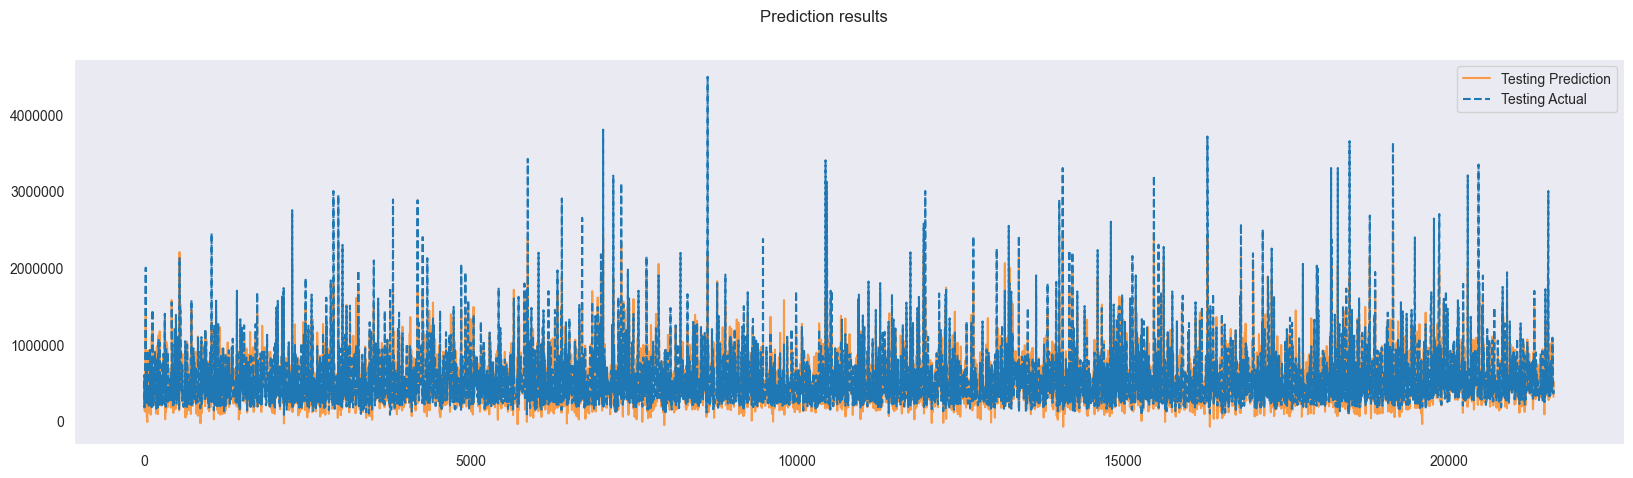

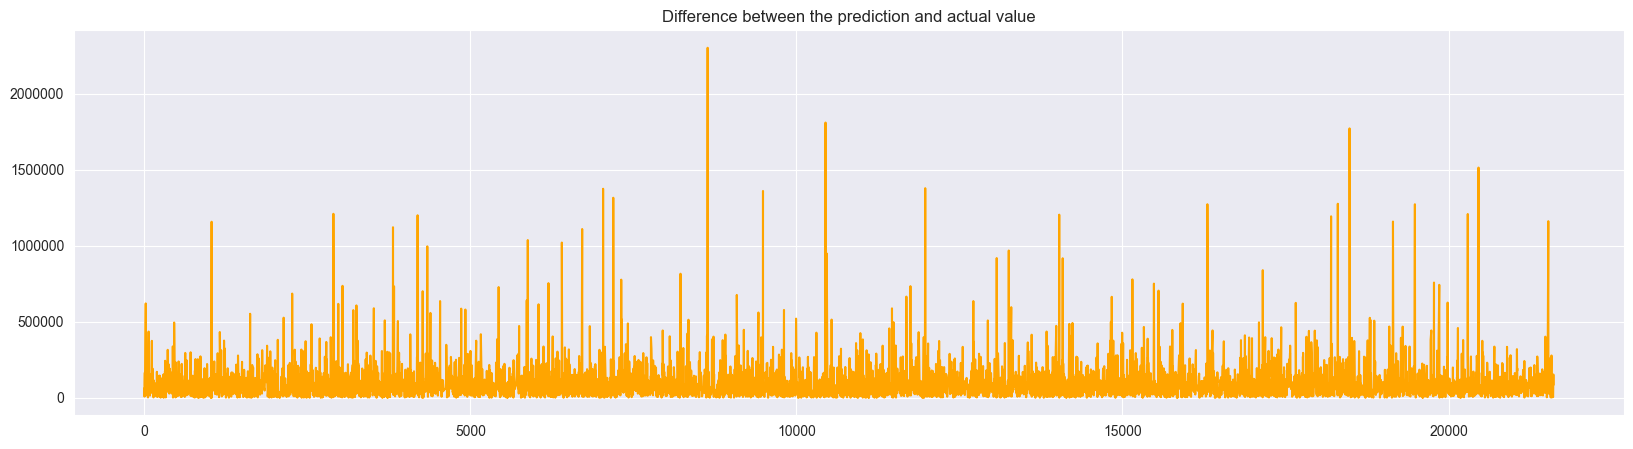

In [352]:
plot_model(y_test, y_pred_mlr_test)

Even though the accuracy is relatively decent, as we can see from the second plot chart, there are a few houses that have a very high difference between the actual and predicted value.

There could be numerous reasons for this, but if the difference is between 500'000 and even 2'000'000, with an R2 score of 81, then it's almost certain that these are for luxurious houses, which are harder to predict.

## K-Nearest-Neighbours Regressor

### Definition

KNN regression is a non-parametric method that, in an intuitive manner,
approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood

![image](images/knn_definition.png)

### Fitting the model

In [353]:
knnr_model = KNeighborsRegressor()
knnr_model.fit(x_train_norm, y_train_norm)

KNeighborsRegressor()

### Making the prediction

In [354]:
y_pred_knnr_test = knnr_model.predict(x_test_norm) * std_y + mean_y
y_pred_knnr_train = knnr_model.predict(x_train_norm) * std_y + mean_y

### Results

In [355]:
knnr_results = print_cross_validation_results(knnr_model, x, y, 'KNN Regressor')

6-Fold Cross-Validation Scores For The KNN Regressor Model:

----------------------------------------------------------------

R squared (Testing Set): 0.51
Mean Absolute Error (Testing Set): 157192.61298466098
Mean Absolute Error Percentage (Testing Set): 31.61%


R squared (Training Set): 0.68
Mean Absolute Error (Training Set): 127490.2124381442
Mean Absolute Error Percentage (Training Set): 25.56%


## XGB Regressor

### Definition

XGBoost stands for "Extreme Gradient Boosting" and it is an implementation of gradient boosting trees algorithm.
It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

When using gradient boosting for regression, the weak learners are regression trees, and each regression tree maps an input data point to one of its leafs that contains a continuous score.

XGBoost minimizes a regularized (L1 and L2) objective function that combines a convex loss function (based on the difference between the predicted and target outputs) and a penalty term for model complexity (in other words, the regression tree functions).

The training proceeds iteratively, adding new trees that predict the residuals or errors of prior trees that are then combined with previous trees to make the final prediction.

It's called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.

I decided to try out this model as well, because a lot of sources seem to be on consensus that it is one of the best algorithms available for machine learning problems.

![xgbr image](images/xgb_definition.png)

### Fitting the model

In [356]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# # n_jobs: -1 makes sure it uses all processors.
# params = { 'max_depth': [3, 10],
#           'learning_rate': [0.01, 0.1],
#           'n_estimators': [50, 150],
#           'n_jobs': [-1]}

xgbr = xgb.XGBRegressor(seed=100, silent=True)

# grid_search = GridSearchCV(estimator = xgbr, scoring = SCORING_TYPE, cv=K_FOLD, refit = 'r2', verbose = 1)

xgbr.fit(x_train_norm, y_train_norm)

xgb_regressor = xgbr

[20:32:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



### Making the prediction

In [357]:
xgb_train_pred = xgb_regressor.predict(x_train_norm) * std_y + mean_y
xgb_val_pred = xgb_regressor.predict(x_test_norm) * std_y + mean_y

### Results

In [358]:
xgb_results = (print_cross_validation_results(xgb_regressor, x, y, 'XGB Regressor'))

[20:32:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:32:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:32:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:32:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:32:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:32:58] WARNING: 

### Plots

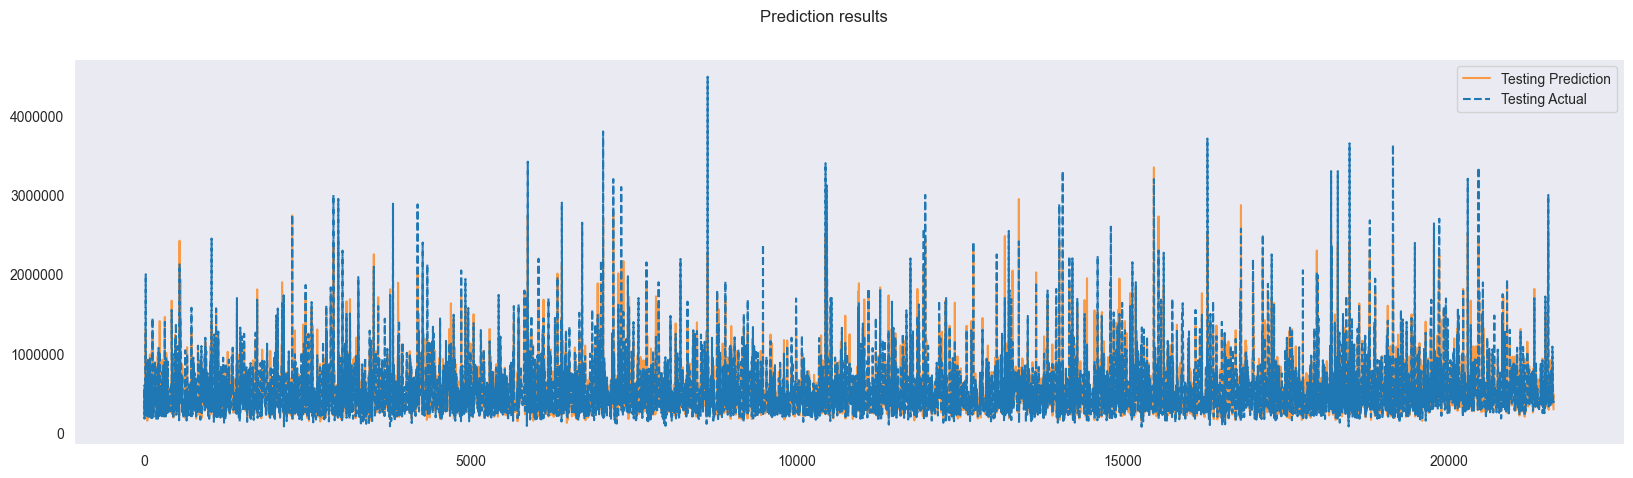

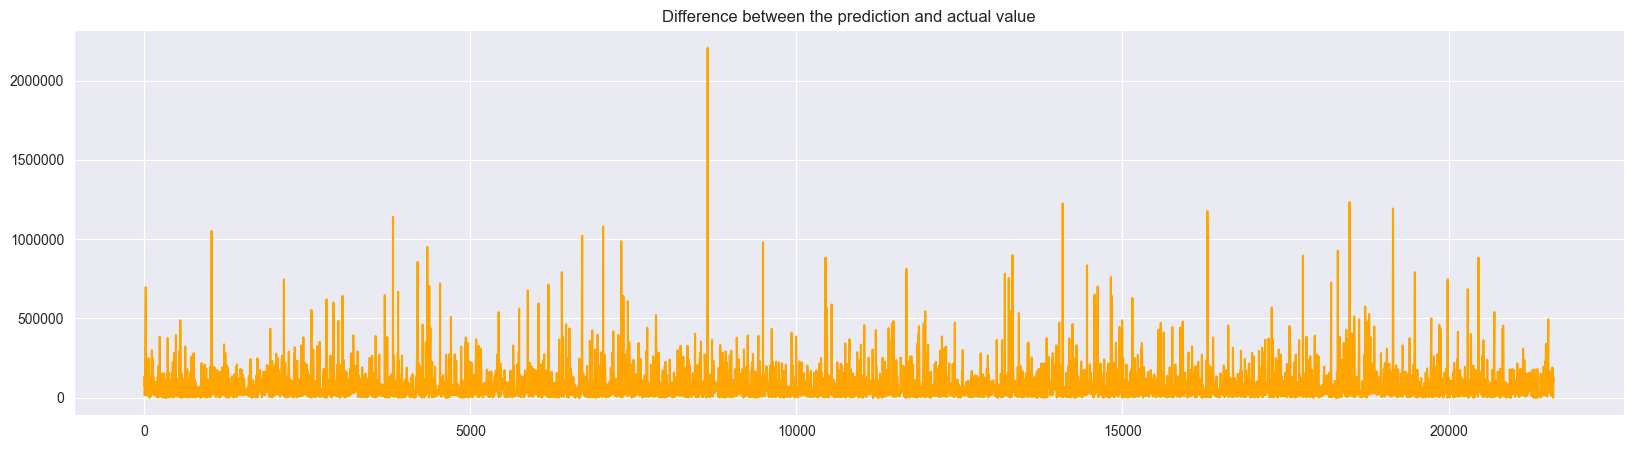

In [359]:
plot_model(y_test, xgb_val_pred)

## Feed-Forward Neural Network

### Definition

Feed forward neural networks are artificial neural networks in which nodes do not form loops.

This type of neural network is also known as a multi-layer neural network as all information is only passed forward.

During data flow, input nodes receive data, which travel through hidden layers, and exit output nodes and the network is devoid of links that would allow the information exiting the output node to be sent back into the network.

![ff_nn_image](images/ff_nn_definition.png)

### Fitting the model

In [360]:
import tensorflow as tf

In [361]:
BATCH_SIZE = 16
N_EPOCHS = 500

In [362]:
def ff_nn_model():
    inp = tf.keras.Input(shape=(x_train_norm.shape[1]))
    dense = tf.keras.layers.Dense(43, activation='relu')(inp)
    dense = tf.keras.layers.Dense(21, activation='relu')(dense)
    dense = tf.keras.layers.Dense(10, activation='relu')(dense)
    dense = tf.keras.layers.Dense(5, activation='relu')(dense)
    dense = tf.keras.layers.Dense(2, activation='relu')(dense)
    out = tf.keras.layers.Dense(1)(dense)

    model = tf.keras.Model(inputs=inp, outputs=out)
    model.compile(optimizer='adam', loss=tf.keras.losses.mean_absolute_error,
                  metrics=['mean_absolute_error', 'mean_squared_error'])

    return model

In [363]:
train_tf_x = tf.data.Dataset.from_tensor_slices(x_train_norm)
train_tf_y = tf.data.Dataset.from_tensor_slices(y_train_norm)
training_set = tf.data.Dataset.zip((train_tf_x, train_tf_y))
training_set = training_set.batch(BATCH_SIZE)

val_tf_x = tf.data.Dataset.from_tensor_slices(x_test_norm)
val_tf_y = tf.data.Dataset.from_tensor_slices(y_test_norm)
validation_set = tf.data.Dataset.zip((val_tf_x, val_tf_y))
validation_set = validation_set.batch(BATCH_SIZE)

In [364]:
simple_ff_nn_model = ff_nn_model()

In [365]:
simple_ff_nn_model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 85)]              0         
                                                                 
 dense_79 (Dense)            (None, 43)                3698      
                                                                 
 dense_80 (Dense)            (None, 21)                924       
                                                                 
 dense_81 (Dense)            (None, 10)                220       
                                                                 
 dense_82 (Dense)            (None, 5)                 55        
                                                                 
 dense_83 (Dense)            (None, 2)                 12        
                                                                 
 dense_84 (Dense)            (None, 1)                 3  

For the model fitting, I will make use of EarlyStopping, which ensures that the model fitting is stopped once no improvement is registered for 5 consecutive epochs.

In [366]:
early_stopping = EarlyStopping(monitor='loss', mode='min', patience=5)
history = simple_ff_nn_model.fit(training_set, validation_data=validation_set, epochs=N_EPOCHS,
                                 callbacks=early_stopping)

Epoch 1/500
946/946 [==============================] - 1s 1ms/step - loss: 0.3530 - mean_absolute_error: 0.3530 - mean_squared_error: 0.3545 - val_loss: 0.2416 - val_mean_absolute_error: 0.2416 - val_mean_squared_error: 0.1439
Epoch 2/500
946/946 [==============================] - 1s 984us/step - loss: 0.2185 - mean_absolute_error: 0.2185 - mean_squared_error: 0.1417 - val_loss: 0.2127 - val_mean_absolute_error: 0.2127 - val_mean_squared_error: 0.1221
Epoch 3/500
946/946 [==============================] - 1s 1ms/step - loss: 0.2041 - mean_absolute_error: 0.2041 - mean_squared_error: 0.1283 - val_loss: 0.2076 - val_mean_absolute_error: 0.2076 - val_mean_squared_error: 0.1186
Epoch 4/500
946/946 [==============================] - 1s 995us/step - loss: 0.1990 - mean_absolute_error: 0.1990 - mean_squared_error: 0.1229 - val_loss: 0.2023 - val_mean_absolute_error: 0.2023 - val_mean_squared_error: 0.1142
Epoch 5/500
946/946 [==============================] - 1s 986us/step - loss: 0.1951 - me

### Making the prediction

In [367]:
ff_nn_train_pred = simple_ff_nn_model.predict(training_set) * std_y + mean_y
ff_nn_train_pred = ff_nn_train_pred[:, 0]

ff_nn_val_pred = simple_ff_nn_model.predict(validation_set) * std_y + mean_y
ff_nn_val_pred = ff_nn_val_pred[:, 0]

406/406 [==============================] - 0s 681us/step


### Results

In [368]:
# Note:
# I tried using KFold Cross Validation, but it didn't work with Keras Neural Network.
# keras_clf = KerasClassifier(model = simple_tf_model, optimizer = 'adam', epochs = n_epochs, batch_size=BATCH_SIZE, verbose = 1)

nn_results = print_regular_results(y_train, ff_nn_train_pred, y_test, ff_nn_val_pred, 'FF Neural Network')

6-Fold Cross-Validation Scores For The FF Neural Network Model:

----------------------------------------------------------------

R squared (Testing Set): 0.88
Mean Absolute Error (Testing Set): 71251.28919867345
Mean Absolute Error Percentage (Testing Set): 13.54%


R squared (Training Set): 0.92
Mean Absolute Error (Training Set): 56923.30771900826
Mean Absolute Error Percentage (Training Set): 11.15%


### Plots

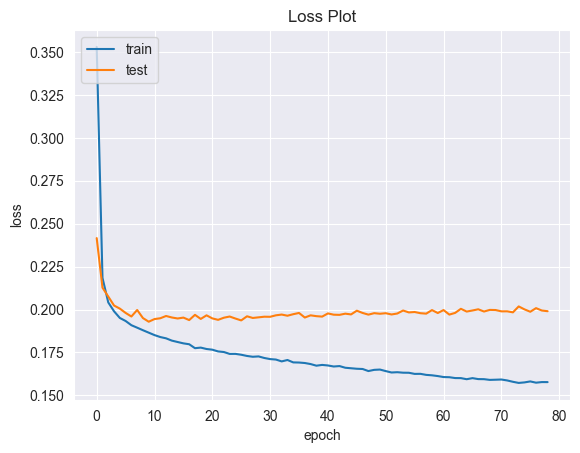

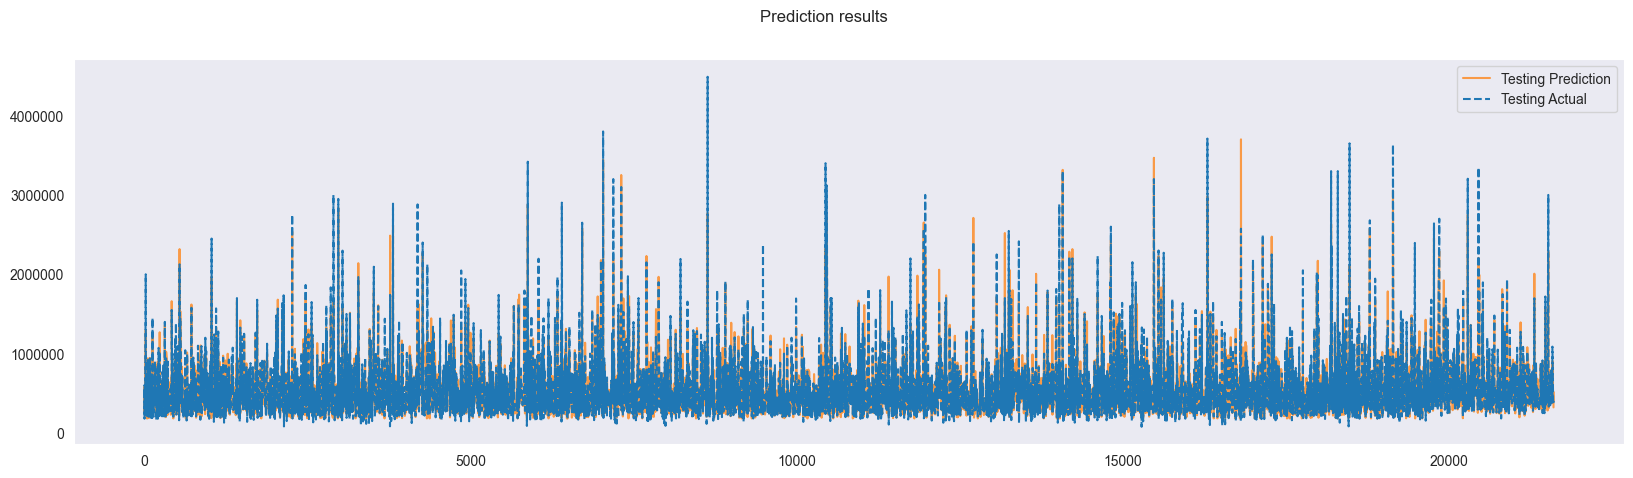

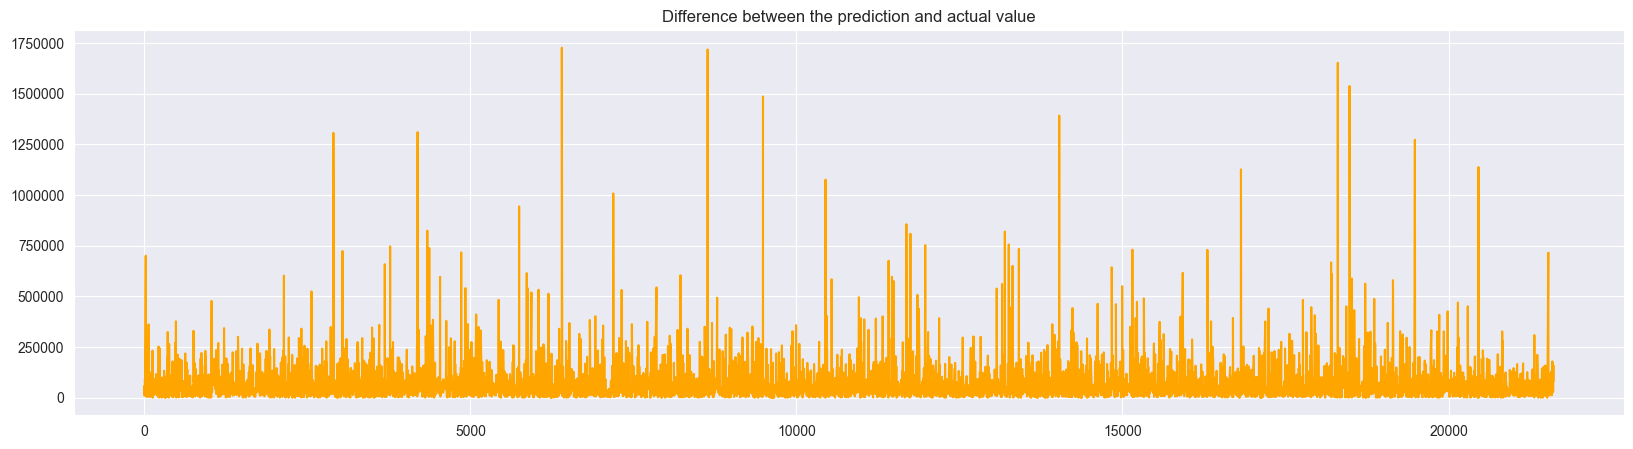

In [369]:
# Loss per epoch plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Results plots
plot_model(y_test, ff_nn_val_pred)

## Hyperparameter tuning

Although there are multiple ways to do hyperparameter tuning, such as:
- neural network nodes, layers, batch sizes, epochs
- KNN 'n_neighbours' parameter
- etc.

For this section I will only do hyperparameter tuning with search methods.

### Linear regression

For the Multiple Linear Regression, there are no ways to do hyperparameter tuning (as far as I know), so this will be skipped.

### KNN Regressor

#### GridSearchCV

##### Testing

In [376]:
knnr_grid_params = {
    'n_neighbors': [5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'n_jobs': [-1]
}

# Didn't do leaf_size, this should be enough...

In [377]:
knnr_grid_search = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=knnr_grid_params, verbose=1, cv=K_FOLD, refit='r2')

# grid_search = GridSearchCV(estimator = xgbr, scoring = SCORING_TYPE, cv=K_FOLD, refit = 'r2', verbose = 1)

In [378]:
knnr_grid_search_results = knnr_grid_search.fit(x_train_norm, y_train_norm)

Fitting 6 folds for each of 288 candidates, totalling 1728 fits


In [379]:
print('Best score: {}\nAchieved with: {}'.format(knnr_grid_search_results.best_score_, knnr_grid_search_results.best_params_))

Best score: 0.823204534487907
Achieved with: {'algorithm': 'kd_tree', 'metric': 'minkowski', 'n_jobs': -1, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


##### Fitting the model with best parameters

In [380]:
knnr_grid_best_model = knnr_grid_search.best_estimator_
knnr_grid_best_model.fit(x_train_norm, y_train_norm)

KNeighborsRegressor(algorithm='kd_tree', n_jobs=-1, p=1, weights='distance')

##### Making a prediction

In [381]:
y_pred_knnr_grid_best_model_test = knnr_grid_best_model.predict(x_test_norm) * std_y + mean_y
y_pred_knnr_grid_best_model_train = knnr_grid_best_model.predict(x_train_norm) * std_y + mean_y

##### Results

In [382]:
knnr_best_grid_model_results = print_cross_validation_results(knnr_grid_best_model, x, y, 'KNN Regressor (GridSearchCV)')

6-Fold Cross-Validation Scores For The KNN Regressor (GridSearchCV) Model:

----------------------------------------------------------------

R squared (Testing Set): 0.52
Mean Absolute Error (Testing Set): 152726.8097464914
Mean Absolute Error Percentage (Testing Set): 30.42%


R squared (Training Set): 1.00
Mean Absolute Error (Training Set): 957.9197437063071
Mean Absolute Error Percentage (Training Set): 0.31%


##### Plots

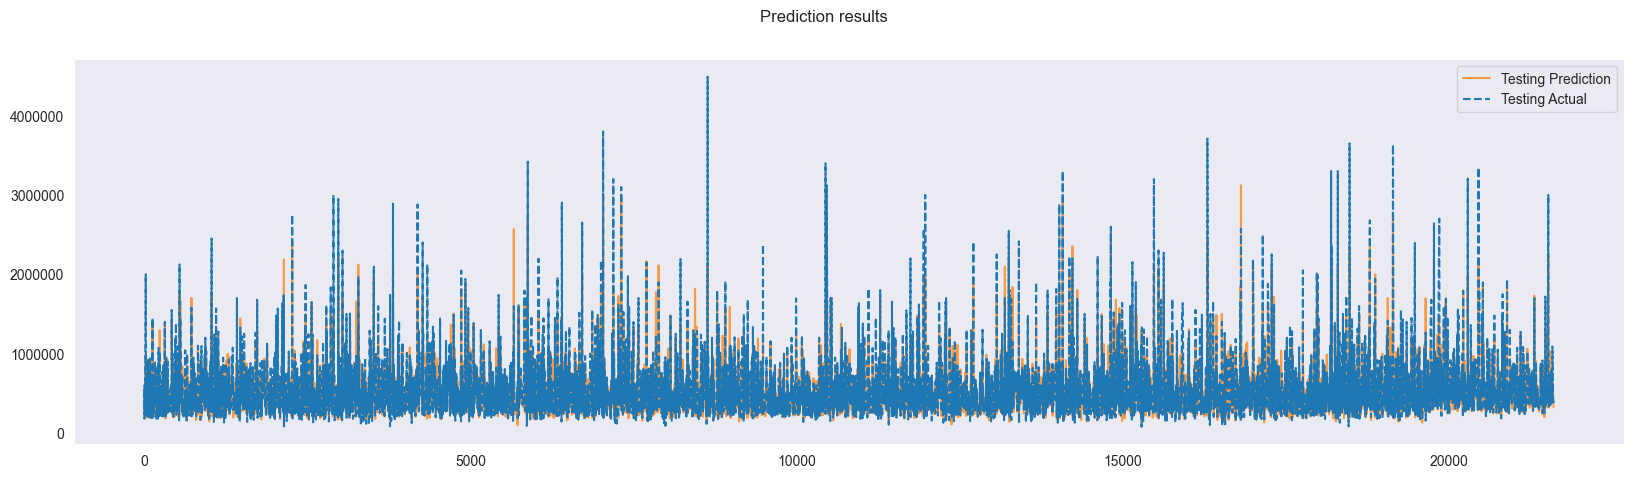

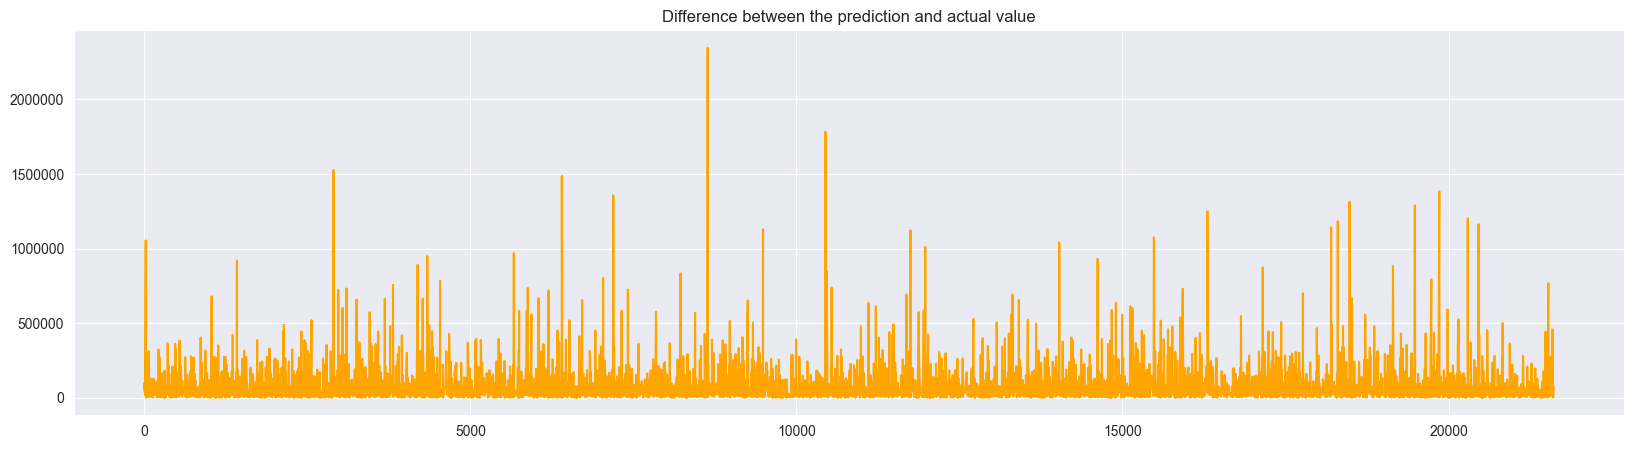

In [383]:
# Results plots
plot_model(y_test, y_pred_knnr_grid_best_model_test)

#### RandomizedSearchCV

##### Testing

In [384]:
knnr_randomized_params = {
    'n_neighbors': [5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'n_jobs': [-1]
}

# Didn't do leaf_size, this should be enough...

In [385]:
knnr_randomized_search = RandomizedSearchCV(estimator=KNeighborsRegressor(), param_distributions=knnr_randomized_params, verbose=1, cv=K_FOLD, scoring=SCORING_TYPE, refit='r2')

In [386]:
knnr_randomized_search_results = knnr_randomized_search.fit(x_train_norm, y_train_norm)

Fitting 6 folds for each of 10 candidates, totalling 60 fits


In [387]:
print('Best score: {}\nAchieved with: {}'.format(knnr_randomized_search_results.best_score_, knnr_randomized_search_results.best_params_))

Best score: 0.823204534487907
Achieved with: {'weights': 'distance', 'p': 2, 'n_neighbors': 5, 'n_jobs': -1, 'metric': 'manhattan', 'algorithm': 'kd_tree'}


##### Fitting the model with best parameters

In [388]:
knnr_randomized_best_model = knnr_randomized_search.best_estimator_
knnr_randomized_best_model.fit(x_train_norm, y_train_norm)

KNeighborsRegressor(algorithm='kd_tree', metric='manhattan', n_jobs=-1,
                    weights='distance')

##### Making a prediction

In [389]:
y_pred_knnr_randomized_best_model_test = knnr_randomized_best_model.predict(x_test_norm) * std_y + mean_y
y_pred_knnr_randomized_best_model_train = knnr_randomized_best_model.predict(x_train_norm) * std_y + mean_y

##### Results

In [390]:
knnr_best_randomized_model_results = print_cross_validation_results(knnr_randomized_best_model, x, y, 'KNN Regressor (RandomizedSearchCV)')

6-Fold Cross-Validation Scores For The KNN Regressor (RandomizedSearchCV) Model:

----------------------------------------------------------------

R squared (Testing Set): 0.52
Mean Absolute Error (Testing Set): 152726.8097464914
Mean Absolute Error Percentage (Testing Set): 30.42%


R squared (Training Set): 1.00
Mean Absolute Error (Training Set): 957.9197437063071
Mean Absolute Error Percentage (Training Set): 0.31%


##### Plots

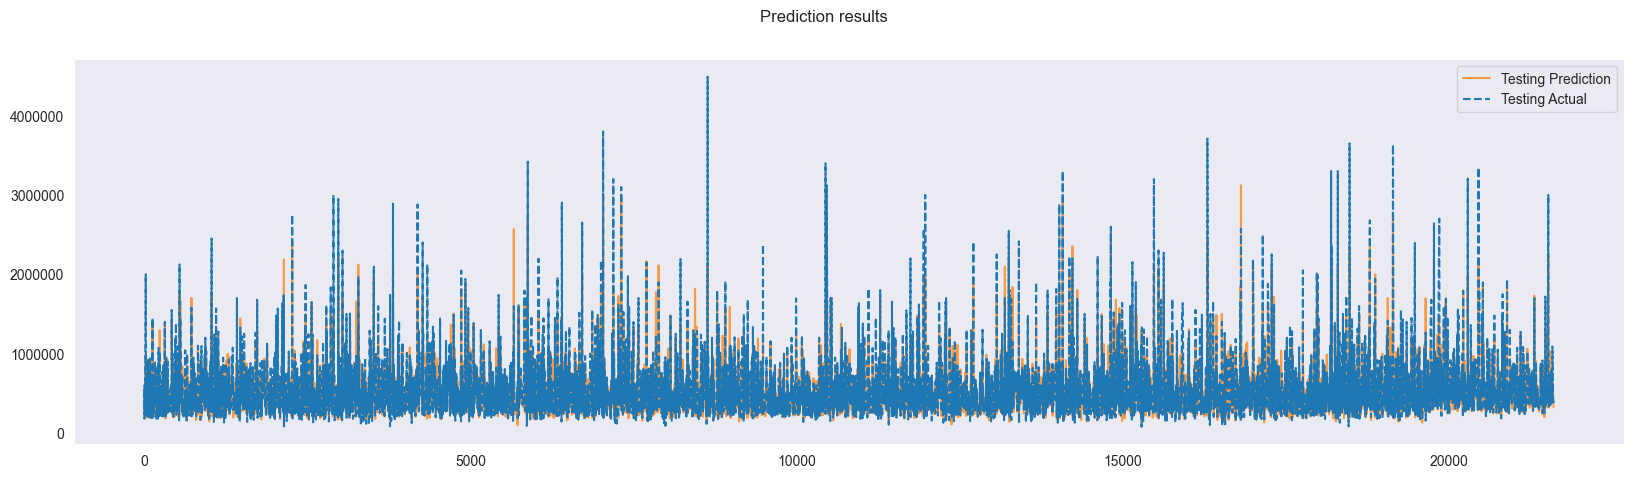

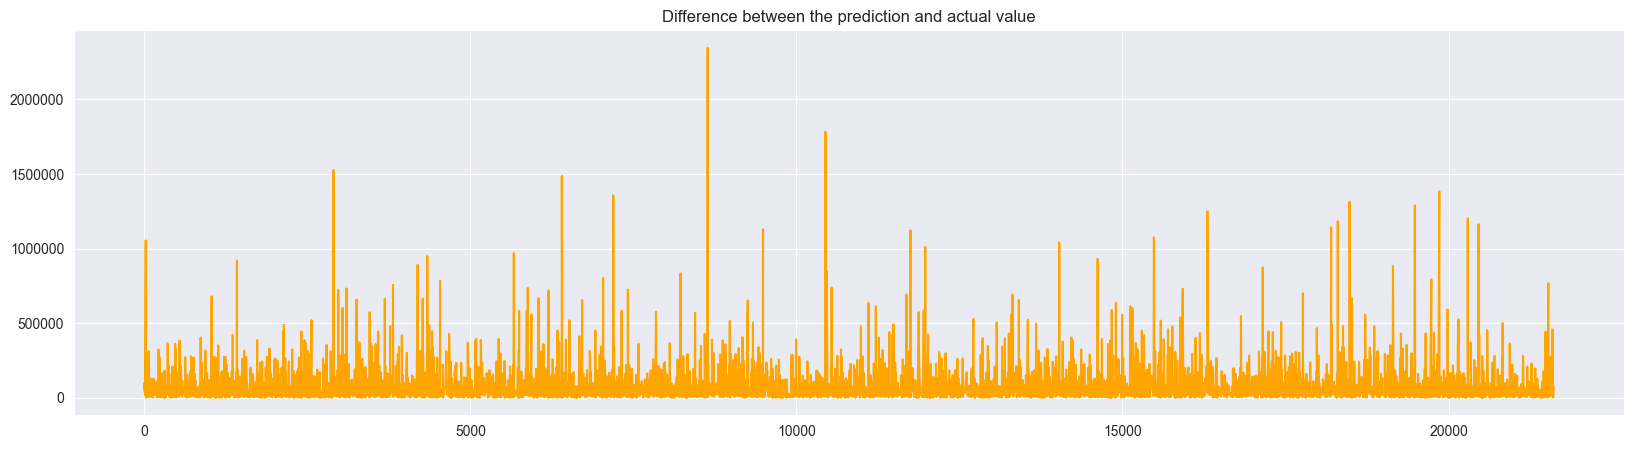

In [391]:
# Results plots
plot_model(y_test, y_pred_knnr_randomized_best_model_test)

### XGB Regressor

#### GridSearchCV

##### Testing

In [392]:
xgbr_grid_params = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror'],
        'n_jobs': [-1]
    }

xgbr_grid_search = GridSearchCV(estimator=xgb.XGBRegressor(seed=100, silent=True), param_grid=xgbr_grid_params, verbose=1, cv=K_FOLD, scoring=SCORING_TYPE, refit='r2')

In [393]:
xgbr_grid_search_results = xgbr_grid_search.fit(x_train_norm, y_train_norm)

Fitting 6 folds for each of 288 candidates, totalling 1728 fits
[20:47:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:47:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:47:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:47:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[20:47:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:76

In [394]:
print('Best score: {}\nAchieved with: {}'.format(xgbr_grid_search_results.best_score_, xgbr_grid_search_results.best_params_))

Best score: 0.8739897629944465
Achieved with: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 500, 'n_jobs': -1, 'objective': 'reg:squarederror', 'subsample': 0.7}


##### Fitting the model with best parameters

In [395]:
xgbr_grid_best_model = xgbr_grid_search.best_estimator_
xgbr_grid_best_model.fit(x_train_norm, y_train_norm)

[21:23:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=100, ...)

##### Making a prediction

In [396]:
y_pred_xgbr_grid_best_model_test = xgbr_grid_best_model.predict(x_test_norm) * std_y + mean_y
y_pred_xgbr_grid_best_model_train = xgbr_grid_best_model.predict(x_train_norm) * std_y + mean_y

##### Results

In [397]:
xgbr_best_grid_model_results = print_cross_validation_results(xgbr_grid_best_model, x, y, 'XGB Regressor (GridSearchCV)')

[21:23:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[21:23:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[21:23:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[21:23:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[21:23:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[21:23:35] WARNING: 

##### Plots

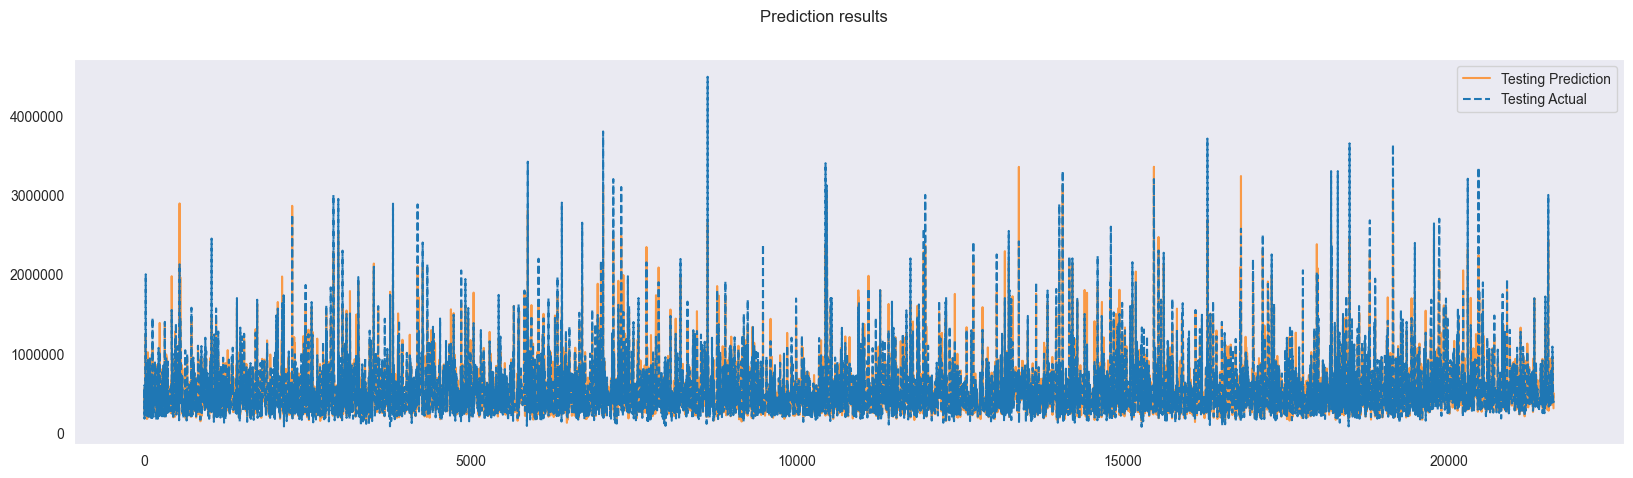

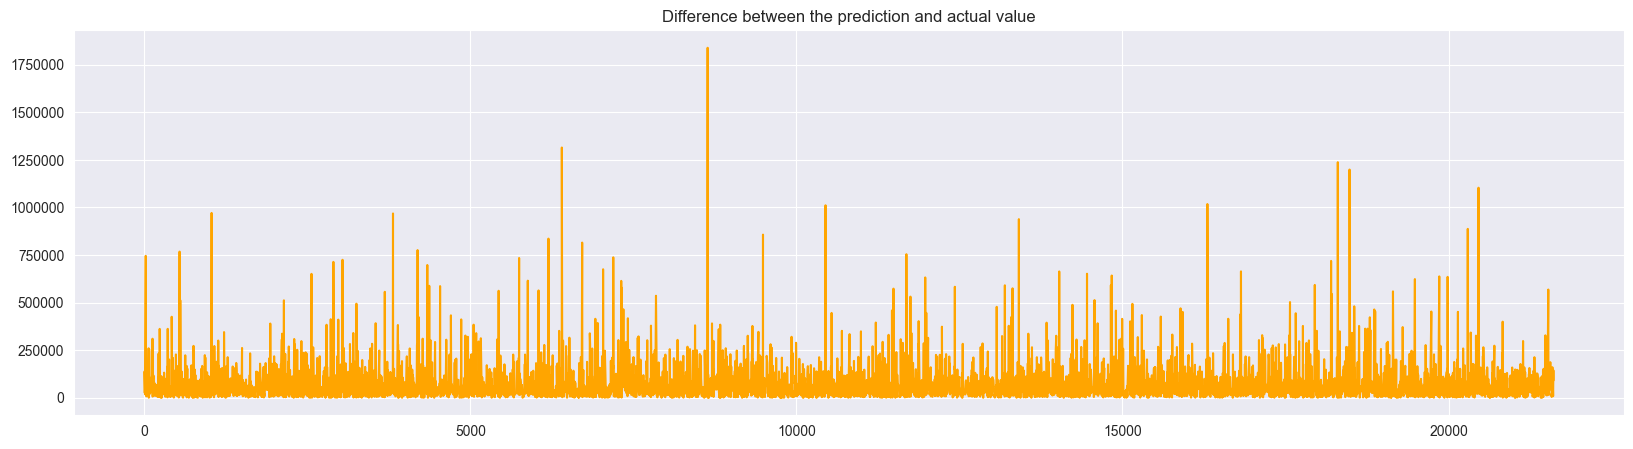

In [398]:
# Results plots
plot_model(y_test, y_pred_xgbr_grid_best_model_test)

#### RandomizedSearchCV

##### Testing

In [399]:
xgbr_randomized_params = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'n_estimators': [100, 200, 500],
    'objective': ['reg:squarederror'],
    'n_jobs': [-1]
}

xgbr_randomized_search = RandomizedSearchCV(estimator=xgb.XGBRegressor(seed=100, silent=True), param_distributions=xgbr_randomized_params, verbose=1, cv=K_FOLD, scoring=SCORING_TYPE, refit='r2')

In [400]:
xgbr_randomized_search_results = xgbr_randomized_search.fit(x_train_norm, y_train_norm)

Fitting 6 folds for each of 10 candidates, totalling 60 fits
[21:23:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[21:23:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[21:23:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[21:23:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[21:23:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 

In [401]:
print('Best score: {}\nAchieved with: {}'.format(xgbr_randomized_search_results.best_score_, xgbr_randomized_search_results.best_params_))

Best score: 0.8679656302831423
Achieved with: {'subsample': 0.5, 'objective': 'reg:squarederror', 'n_jobs': -1, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.7}


##### Fitting the model with best parameters

In [402]:
xgbr_randomized_best_model = xgbr_randomized_search_results.best_estimator_
xgbr_randomized_best_model.fit(x_train_norm, y_train_norm)

[21:25:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.



XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=3, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=100, ...)

##### Making a prediction

In [403]:
y_pred_xgbr_randomized_best_model_test = xgbr_randomized_best_model.predict(x_test_norm) * std_y + mean_y
y_pred_xgbr_randomized_best_model_train = xgbr_randomized_best_model.predict(x_train_norm) * std_y + mean_y

##### Results

In [404]:
xgbr_best_randomized_model_results = print_cross_validation_results(xgbr_randomized_best_model, x, y, 'XGB Regressor (RandomizedSearchCV)')

[21:25:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[21:25:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[21:25:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[21:25:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[21:25:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[21:25:23] WARNING: 

##### Plots

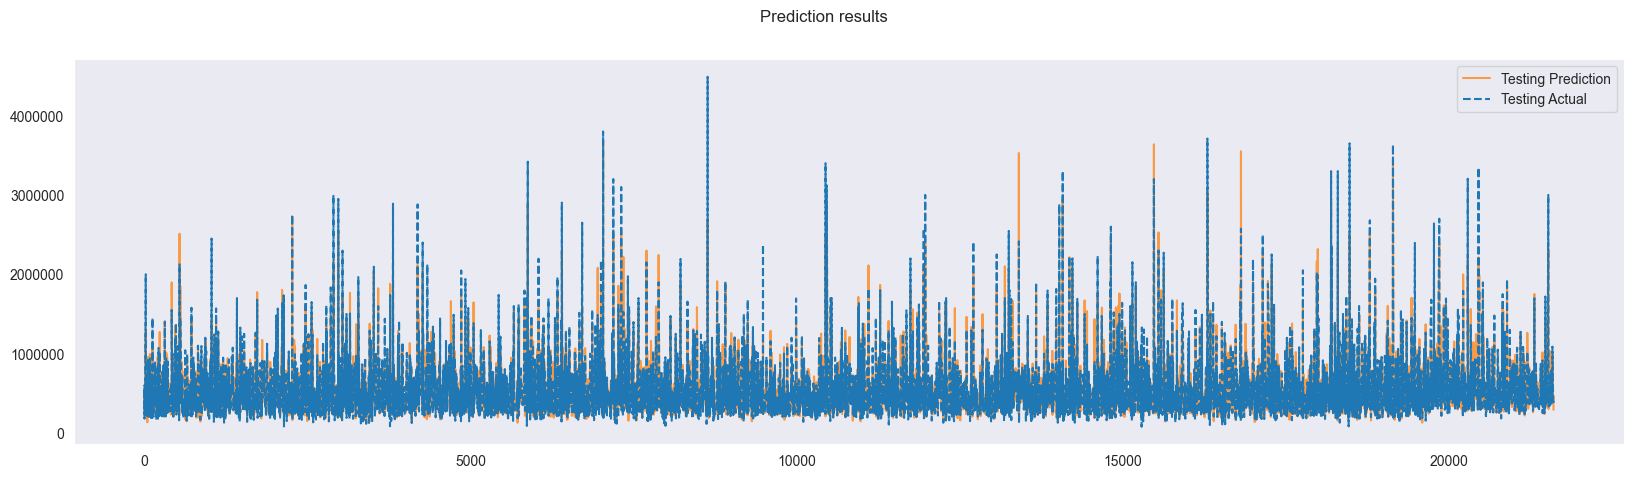

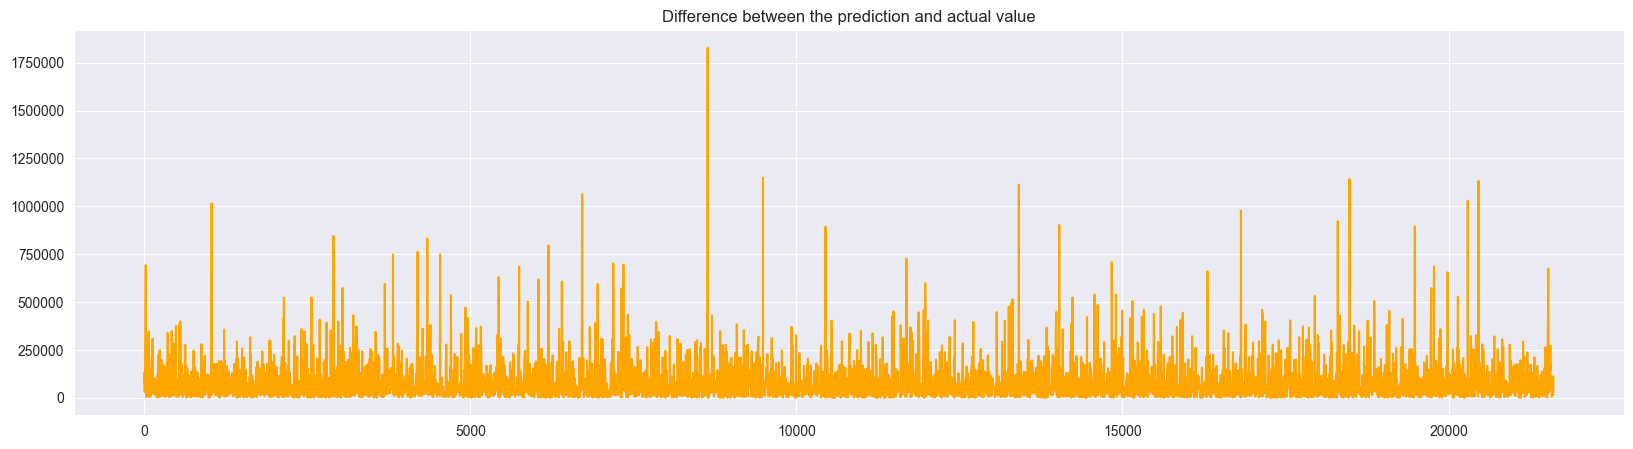

In [405]:
# Results plots
plot_model(y_test, y_pred_xgbr_randomized_best_model_test)

## Feed-Forward Neural Network

I wanted to do this one, but realized I wouldn't make it in time, the tuner would be running for multiple hours (even the XGB Regression was being tuned for ~40 minutes).

I looked into your Machine Learning example on 'Hyperparameter tuning with Keras Tuner' so I sort of have an idea on how that would work, but I didn't manage to try it out...

## Summary

In [407]:
results = pd.concat([mlr_results, knnr_results, xgb_results, nn_results, knnr_best_grid_model_results, knnr_best_randomized_model_results, xgbr_best_grid_model_results, xgbr_best_randomized_model_results])

styled_results = results.style.background_gradient(cmap='Greens', axis=None, subset=['Train R2'])
styled_results = styled_results.background_gradient(cmap='Reds', axis=None, subset=['Train MAE'])
styled_results = styled_results.background_gradient(cmap='Reds', axis=None, subset=['Train MAPE'])
styled_results = styled_results.background_gradient(cmap='Greens', axis=None, subset=['Test R2'])
styled_results = styled_results.background_gradient(cmap='Reds', axis=None, subset=['Test MAE'])
styled_results = styled_results.background_gradient(cmap='Reds', axis=None, subset=['Test MAPE'])

styled_results

,Test R2,Test MAE,Test MAPE,Train R2,Train MAE,Train MAPE
Multiple Linear Regression,0.811049,94839.876936,19.444951,0.814563,94231.755490,19.329914
KNN Regressor,0.507501,157192.612985,31.613673,0.677610,127490.212438,25.558702
XGB Regressor,0.870329,74562.339586,14.366173,0.959716,50883.887325,11.034521
FF Neural Network,0.878402,71251.289199,13.537953,0.922220,56923.307719,11.148885
KNN Regressor (GridSearchCV),0.524876,152726.809746,30.423919,0.999239,957.919744,0.306646
KNN Regressor (RandomizedSearchCV),0.524876,152726.809746,30.423919,0.999239,957.919744,0.306646
XGB Regressor (GridSearchCV),0.887914,69599.479381,13.468962,0.963157,49272.924266,10.761323
XGB Regressor (RandomizedSearchCV),0.879405,75108.885597,14.787819,0.925280,66965.952344,13.908943


Although the results (for the most part) seem decent, I can't fully confirm whether the models are good or not.
What I mean by that, is that I would have to dig a bit deeper and hyper analyse the actual vs predicted values, because it's a bit hard to tell from my plots.

If we look purely on the 'Testing Set R Squared Value', there are a few decent models:
- Multiple Linear Regression (sort of)
- XGB Regressor
- FF Neural Network
- XGB Regressor (GridSearchCV)
- XGB Regressor (RandomizedSearchCV)

But the Mean Average Error is way too high for my liking, I would personally like to inspect how big of an impact the luxurious houses have on this value.
Maybe limit the dataset even more by excluding houses over a certain price threshold.

Regarding the Hyper Parameter tuning, it seems like in all 4 attempts it gave a performance increase, so that is nice to see.

Ideally I would've also liked to do Hyper Parameter tuning for the 'FF Neural Network', since that was my best performing model right out of the gates, but it is what it is.

Things I could try in the future:
- Reconsider my decisions for feature selection
- Reconsider my decisions for outlier removal
- Analyse the results a bit more and make improvements based on that
- Try out some other machine learning models